In [27]:
from keras.models import load_model #embedding용 facenet모델
from mtcnn.mtcnn import MTCNN #얼굴인식용 mtcnn
from PIL import Image #이미지 불러오기
from numpy import asarray #배열 변환
from numpy import savez_compressed #배열 단일 압축 저장
from numpy import load #배열 압축 불러오기
from numpy import expand_dims #차원 늘리기
from os import listdir #폴더안에 객체들 리스트화
from os.path import isdir #이게 폴더인가?
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder #암호화
from sklearn.preprocessing import Normalizer #일반화
from sklearn.svm import SVC #소프트벡터클래스피어
from random import choice
from keras.models import load_model
import cv2
from selenium import webdriver
from bs4 import BeautifulSoup

jh={'id':'161655', 'pw':'g7219083' }
detector = MTCNN()
model = load_model('face_classfier.h5')
model2 = load_model('facenet_keras.h5')
print('모델 불러오기')

모델 불러오기


C:\Users\PC\anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [28]:
def login(id, pw):
    # 포털사이트 연다.
    driver = webdriver.Chrome('D:/chromedriver.exe')
    driver.get('https://portal.jnu.ac.kr/Common/Login/Login.aspx?')
    delay = 1
    driver.implicitly_wait(delay)

    # ID, Password 입력
    driver.find_element_by_name('ctl00$ContentPlaceHolder1$LoginUser$UserName').send_keys(id)
    driver.find_element_by_name('ctl00$ContentPlaceHolder1$LoginUser$Password').send_keys(pw)

    # 로그인 버튼 클릭
    driver.find_element_by_xpath('//*[@id="ContentPlaceHolder1_LoginUser_LoginButton"]').click()

    # 켜지는 시간동안 기다림
    delay = 1
    driver.implicitly_wait(delay)

    # 이클래스 키는 코드
    #driver.find_element_by_xpath('//*[@id="eclass-side-tab-view"]/div[1]/div[1]/a[1]/span').click()

In [29]:
#사진에서 얼굴인식을 하여 재조정하는 메소드
def extract_face(img, required_size=(160, 160)):

    #배열로 변환
    pixels = asarray(img)
    pyplot.imshow(pixels)
    pyplot.show()
    #감지기 생성
    
    #얼굴 감지
    results = detector.detect_faces(pixels)
    if len(results) == 0 :
        return False
    
    print(results)
    
    #첫 번째 얼굴에서 경계 상자 추출
    x1, y1, width, height = results[0]['box']
    #버그 수정
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    #얼굴 추출
    face = pixels[y1:y2, x1:x2]
    #모델 사이즈로 픽셀 재조정
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    
    print("완료")
    return face_array, x1, y1, x2, y2

In [30]:
def get_embedding(model, face_pixels):
    # 픽셀 값의 척도
    face_pixels = face_pixels.astype('float32')
    # 채널 간 픽셀값 표준화(전역에 걸쳐)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # 얼굴을 하나의 샘플로 변환
    samples = expand_dims(face_pixels, axis=0)
    # 임베딩을 갖기 위한 예측 생성
    yhat = model.predict(samples)
    return yhat[0]

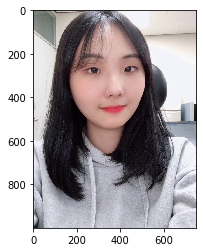

[{'box': [165, 83, 345, 474], 'confidence': 0.9999977350234985, 'keypoints': {'left_eye': (277, 277), 'right_eye': (436, 268), 'nose': (377, 372), 'mouth_left': (297, 448), 'mouth_right': (436, 434)}}]
완료


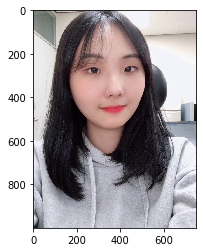

[{'box': [165, 83, 345, 474], 'confidence': 0.9999977350234985, 'keypoints': {'left_eye': (277, 277), 'right_eye': (436, 268), 'nose': (377, 372), 'mouth_left': (297, 448), 'mouth_right': (436, 434)}}]
완료


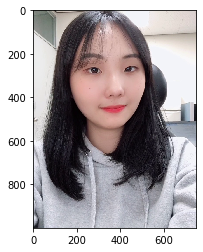

[{'box': [167, 83, 343, 471], 'confidence': 0.999997615814209, 'keypoints': {'left_eye': (280, 277), 'right_eye': (438, 268), 'nose': (379, 370), 'mouth_left': (298, 447), 'mouth_right': (436, 433)}}]
완료


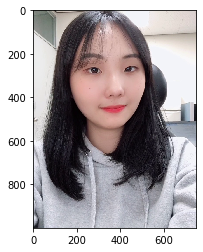

[{'box': [167, 83, 343, 471], 'confidence': 0.999997615814209, 'keypoints': {'left_eye': (280, 277), 'right_eye': (438, 268), 'nose': (379, 370), 'mouth_left': (298, 447), 'mouth_right': (436, 433)}}]
완료


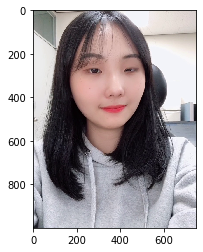

[{'box': [163, 96, 344, 458], 'confidence': 0.9999992847442627, 'keypoints': {'left_eye': (280, 280), 'right_eye': (440, 271), 'nose': (378, 371), 'mouth_left': (299, 447), 'mouth_right': (436, 434)}}]
완료


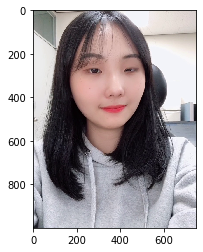

[{'box': [163, 96, 344, 458], 'confidence': 0.9999992847442627, 'keypoints': {'left_eye': (280, 280), 'right_eye': (440, 271), 'nose': (378, 371), 'mouth_left': (299, 447), 'mouth_right': (436, 434)}}]
완료


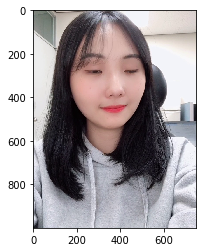

[{'box': [164, 102, 344, 448], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (286, 282), 'right_eye': (445, 276), 'nose': (382, 372), 'mouth_left': (299, 445), 'mouth_right': (436, 433)}}]
완료


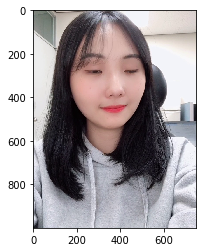

[{'box': [164, 102, 344, 448], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (286, 282), 'right_eye': (445, 276), 'nose': (382, 372), 'mouth_left': (299, 445), 'mouth_right': (436, 433)}}]
완료


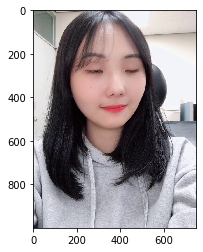

[{'box': [164, 103, 345, 444], 'confidence': 0.9999995231628418, 'keypoints': {'left_eye': (287, 281), 'right_eye': (449, 273), 'nose': (385, 370), 'mouth_left': (304, 444), 'mouth_right': (436, 432)}}]
완료


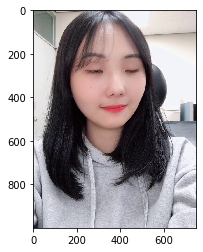

[{'box': [164, 103, 345, 444], 'confidence': 0.9999995231628418, 'keypoints': {'left_eye': (287, 281), 'right_eye': (449, 273), 'nose': (385, 370), 'mouth_left': (304, 444), 'mouth_right': (436, 432)}}]
완료


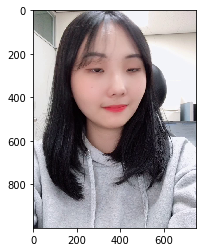

[{'box': [170, 99, 341, 448], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (293, 277), 'right_eye': (452, 271), 'nose': (393, 370), 'mouth_left': (308, 442), 'mouth_right': (441, 432)}}]
완료


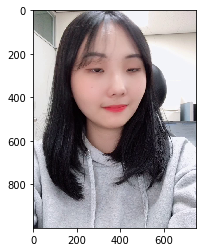

[{'box': [170, 99, 341, 448], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (293, 277), 'right_eye': (452, 271), 'nose': (393, 370), 'mouth_left': (308, 442), 'mouth_right': (441, 432)}}]
완료
로그인


In [32]:
check=0

cap = cv2.VideoCapture('나2.mov')

while cap.isOpened():
    # 카메라 프레임 읽기
    s, frame = cap.read()
    if s:
        #RGB로 변환
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        if extract_face2(frame_rgb)!=False:
            face, x1, y1, x2, y2 = extract_face2(frame_rgb)
            embedding = get_embedding(model2, face)
            embedding = asarray(embedding)
            samples = expand_dims(embedding, axis=0)
            
            yhat_prob = model.predict(samples)
            m=yhat_prob.argmax()
            class_index = m
            class_probability = yhat_prob[0,m] * 100

            name = str(class_index)+"("+str(class_probability)+")"

            # 바운딩박스 생성
            cv2.rectangle(frame,
                         (x1,y1),
                         (x2,y2),
                         (0,255,255),
                         2
                         )
            cv2.putText(frame, name, (x1, y1-5), cv2.FONT_HERSHEY_COMPLEX, 0.8,(0,255,255),2)
            if class_probability>73:
                check+=1
            if check>5:
                print('로그인')
                if class_index == 301:
                    login(jh['id'],jh['pw'])
                    break

            cv2.imshow('Camera Window', frame)
        else:
            cv2.imshow('Camera Window', frame)


        # ESC를 누르면 종료
        key = cv2.waitKey(1) & 0xFF

        if (key == 27): 
            break

    
cap.release()
cv2.destroyAllWindows()
